# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except:
        print(f"City not found. Skipping {city}...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sechura,-5.5569,-80.8222,21.46,76,21,6.00,PE,1702352680
1,port-aux-francais,-49.3500,70.2167,6.05,96,100,7.63,TF,1702352681
2,ambodifotatra,-16.9833,49.8500,26.03,94,75,1.03,MG,1702352682
3,whitehorse,60.7161,-135.0538,3.43,60,75,10.80,CA,1702352682
4,vorgashor,67.5833,63.9500,-16.87,94,100,6.90,RU,1702352539


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sechura,-5.5569,-80.8222,21.46,76,21,6.00,PE,1702352680
1,port-aux-francais,-49.3500,70.2167,6.05,96,100,7.63,TF,1702352681
2,ambodifotatra,-16.9833,49.8500,26.03,94,75,1.03,MG,1702352682
3,whitehorse,60.7161,-135.0538,3.43,60,75,10.80,CA,1702352682
4,vorgashor,67.5833,63.9500,-16.87,94,100,6.90,RU,1702352539


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

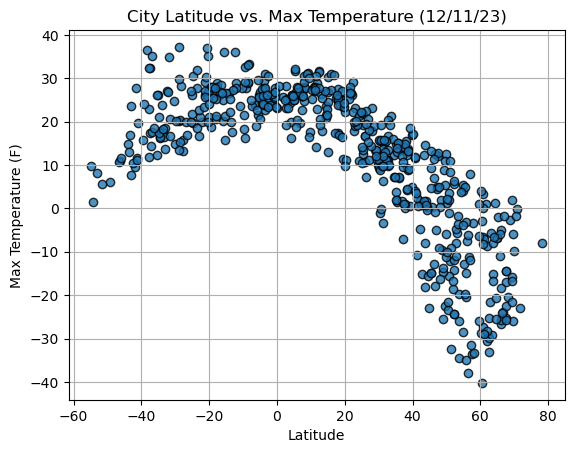

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))  # Adds a title with the current date
plt.ylabel("Max Temperature (F)")  # Adds a label to the y-axis
plt.xlabel("Latitude")  # Adds a label to the x-axis
plt.grid(True)  # Adds a grid to the plot

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

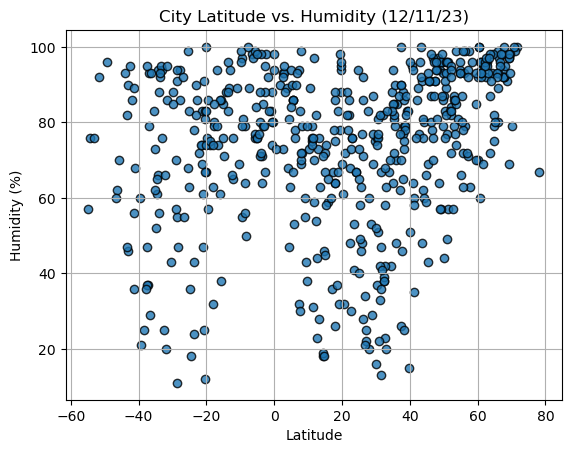

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))  # Title with the current date
plt.ylabel("Humidity (%)")  # Label for the y-axis
plt.xlabel("Latitude")  # Label for the x-axis
plt.grid(True)  # Enable grid


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

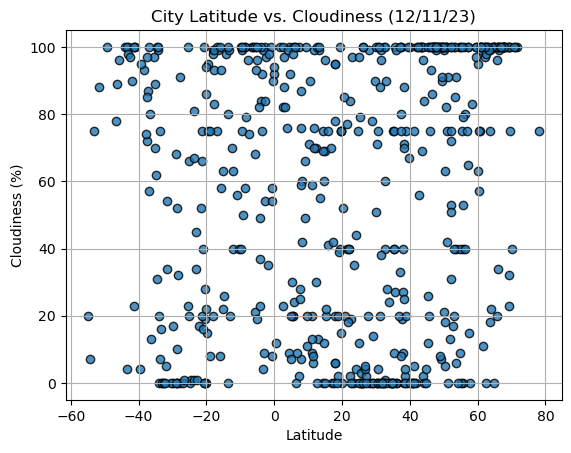

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))  # Title with the current date
plt.ylabel("Cloudiness (%)")  # Label for the y-axis
plt.xlabel("Latitude")  # Label for the x-axis
plt.grid(True)  # Enable grid

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

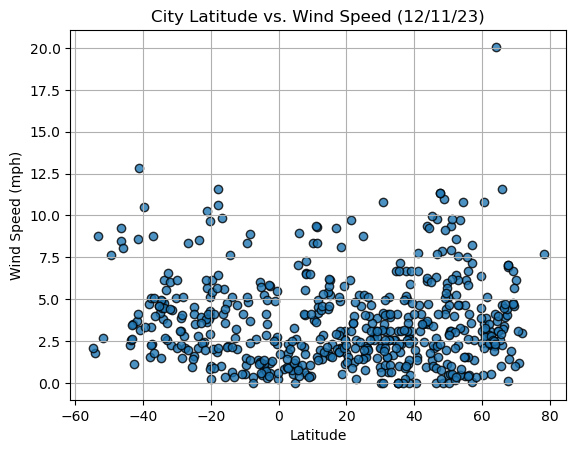

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))  # Title with the current date
plt.ylabel("Wind Speed (mph)")  # Label for the y-axis
plt.xlabel("Latitude")  # Label for the x-axis
plt.grid(True)  # Enable grid

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    reg_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, reg_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,whitehorse,60.7161,-135.0538,3.43,60,75,10.80,CA,1702352682
4,vorgashor,67.5833,63.9500,-16.87,94,100,6.90,RU,1702352539
5,nizhneudinsk,54.9076,99.0276,-28.48,93,9,0.43,RU,1702352684
6,lompoc,34.6391,-120.4579,12.40,88,0,6.71,US,1702352684
8,krasnyy kut,50.9500,46.9667,-12.24,49,100,9.37,RU,1702352685


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sechura,-5.5569,-80.8222,21.46,76,21,6.00,PE,1702352680
1,port-aux-francais,-49.3500,70.2167,6.05,96,100,7.63,TF,1702352681
2,ambodifotatra,-16.9833,49.8500,26.03,94,75,1.03,MG,1702352682
7,majene,-3.5403,118.9707,31.01,64,92,3.51,ID,1702352685
10,port elizabeth,-33.9180,25.5701,17.40,88,20,6.17,ZA,1702352400


###  Temperature vs. Latitude Linear Regression Plot

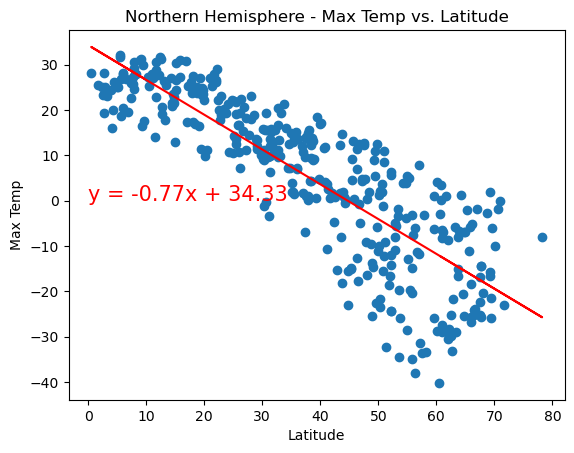

In [23]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Northern Hemisphere - Max Temp vs. Latitude', 'Max Temp', (0, 0))


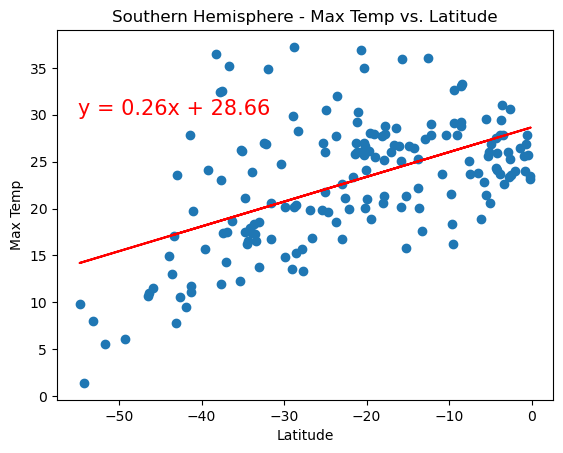

In [24]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Southern Hemisphere - Max Temp vs. Latitude', 'Max Temp', (-55, 30))


**Discussion about the linear relationship:** There is a negative correlation between max temp and latitude in the northern hemisphere and a positive correlation between max temp and latitude in the southern hemisphere.


### Humidity vs. Latitude Linear Regression Plot

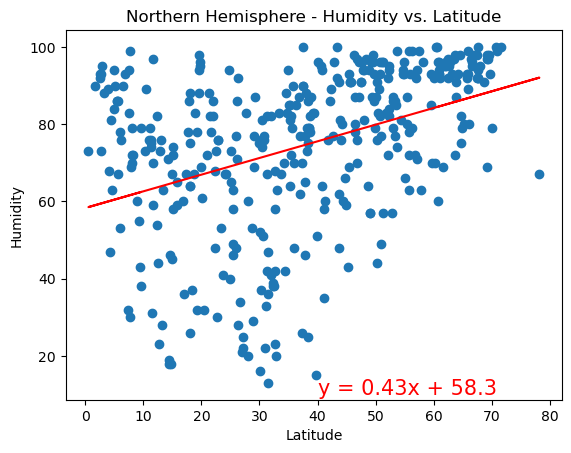

In [25]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Northern Hemisphere - Humidity vs. Latitude', 'Humidity', (40, 10))


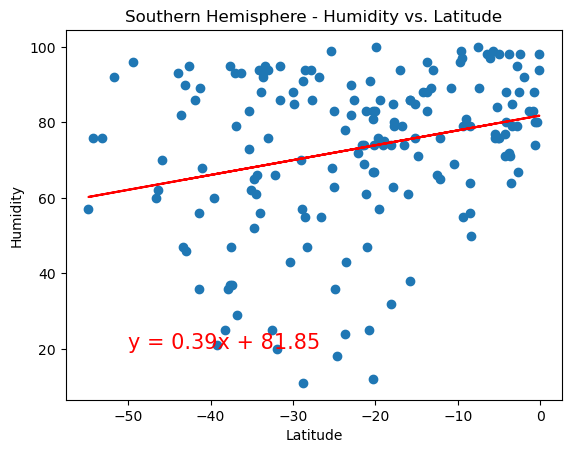

In [26]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Southern Hemisphere - Humidity vs. Latitude', 'Humidity', (-50, 20))


**Discussion about the linear relationship:** There is a positive correlation between humidity and latitude and both the southern and northern hemispheres.


### Cloudiness vs. Latitude Linear Regression Plot

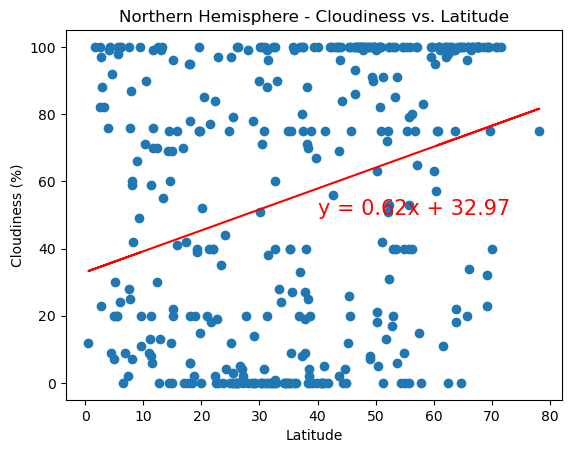

In [27]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Northern Hemisphere - Cloudiness vs. Latitude', 'Cloudiness (%)', (40, 50))


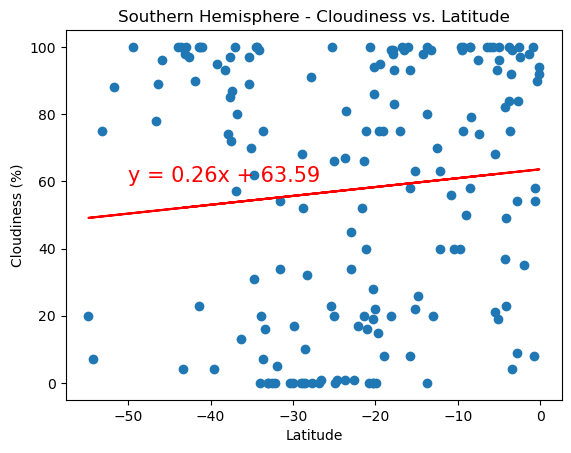

In [28]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Southern Hemisphere - Cloudiness vs. Latitude', 'Cloudiness (%)', (-50, 60))


**Discussion about the linear relationship:** There is a positive correlation between cloudiness and latitude in both the southern and northern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


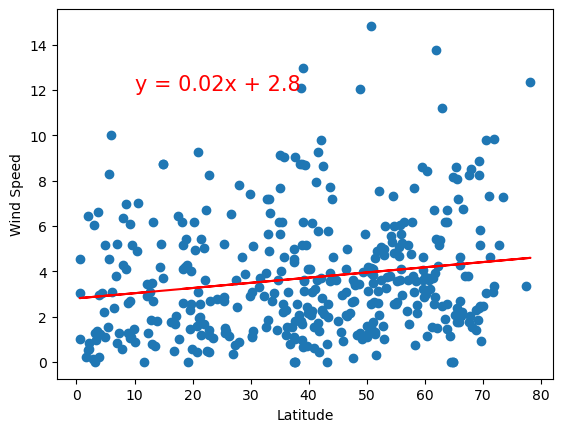

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Northern Hemisphere - Wind Speed vs. Latitude', 'Wind Speed (mph)', (40, 25))


The r-value is: 0.062239040700515696


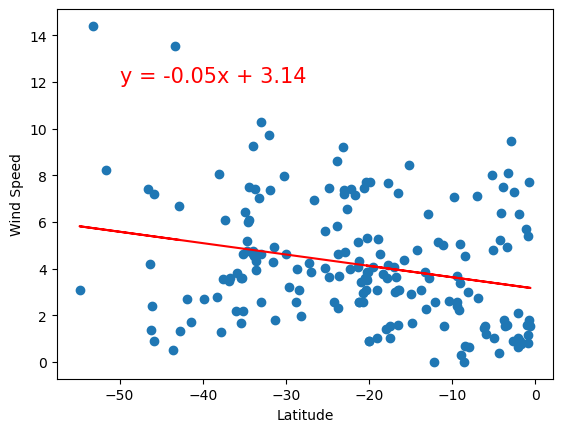

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Southern Hemisphere - Wind Speed vs. Latitude', 'Wind Speed (mph)', (-50, 25))


**Discussion about the linear relationship:** There is a positive correlation between wind speed and latitude in the northern hemisphere and a negative correlation between wind speed and latitude in the southern hemisphere.